Uniform random variable 

$$E[X] = \int_{\alpha}^{\beta} \frac{x}{\beta-\alpha} \cdot dx = \frac{{\beta + \alpha}}{2}$$
$$E[X^2] = \int_{\alpha}^{\beta} \frac{x^2}{\beta-\alpha} \cdot dx = \frac{{\beta^3 - \alpha^2}}{3(\beta - \alpha)}$$
$$\text{Var}(X) = E[X^2] - E[X]^2 = \frac{{(\beta - \alpha)^2}}{12}$$

Uniform random variable in 2D space
$$C = \frac{1}{A}$$
The equation states that for each point in the pdf is all equal likely

In [5]:
def calculate_uniform_rv_mean_variance(a, b):
    # Calculate mean
    mean = (a + b) / 2

    # Calculate mean^2
    mean2 = (a**3 - b**2) / 3*(a - b)
    
    # Calculate variance
    variance = ((b - a) ** 2) / 12

    return mean, mean2, variance


# Example usage
lower_bound = 2
upper_bound = 1

mean, mean2, variance = calculate_uniform_rv_mean_variance(lower_bound, upper_bound)

print("Mean:", mean)
print("Mean^2:", mean2)
print("Variance:", variance)

Mean: 1.5
Mean^2: 2.3333333333333335
Variance: 0.08333333333333333


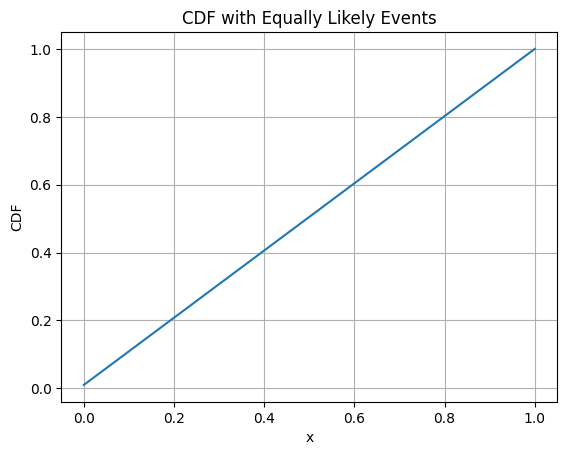

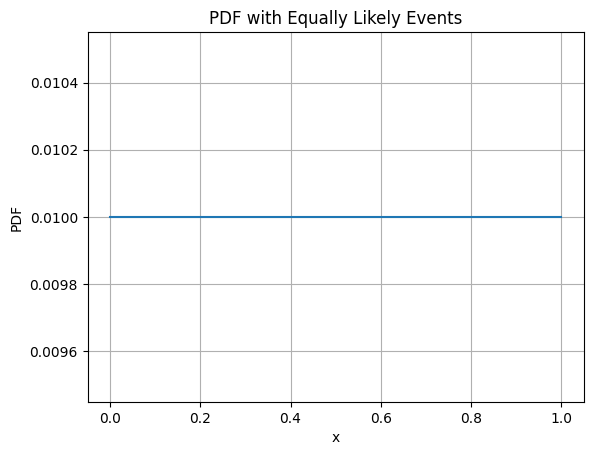

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of the random variable
x = np.linspace(0, 1, 100)

# Calculate the CDF (c in the formulas above)
cdf = np.cumsum(np.full_like(x, 1/len(x)))

# Plotting the CDF
plt.plot(x, cdf)
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('CDF with Equally Likely Events')
plt.grid(True)
plt.show()

# Define the range of the random variable
x = np.linspace(0, 1, 100)

# Calculate the PDF
pdf = np.full_like(x, 1/len(x))

# Plotting the PDF
plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF with Equally Likely Events')
plt.grid(True)
plt.show()


For calculation the properbility of a constinous random variable in the spectrum of a to b in a uniform CDF

The probability between 0.2 and 0.6 is: 0.39999999999999997


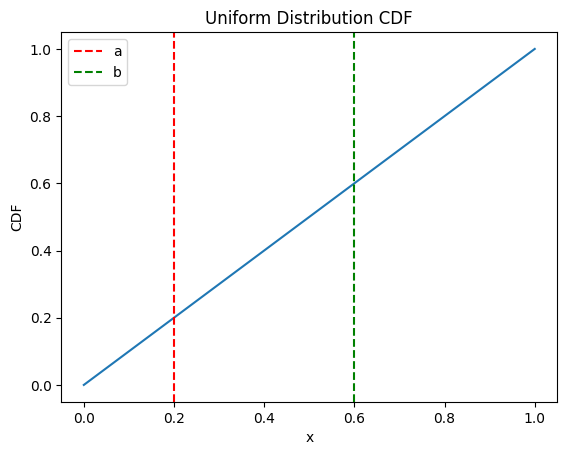

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

def calculate_probability(a, b):
    cdf_b = stats.uniform.cdf(b)
    cdf_a = stats.uniform.cdf(a)
    probability = cdf_b - cdf_a
    return probability

# Example usage
a = 0.2  # Lower bound
b = 0.6  # Upper bound

probability = calculate_probability(a, b)
print(f"The probability between {a} and {b} is: {probability}")

# Plotting the CDF
x = np.linspace(0, 1, 1000)
y = stats.uniform.cdf(x)

plt.plot(x, y)
plt.axvline(x=a, color='r', linestyle='--', label='a')
plt.axvline(x=b, color='g', linestyle='--', label='b')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Uniform Distribution CDF')
plt.legend()
plt.show()


For random cdf, can be difined manually for a set of values:

Integral of PDF over [-1, 1]: 0.4076685338438103


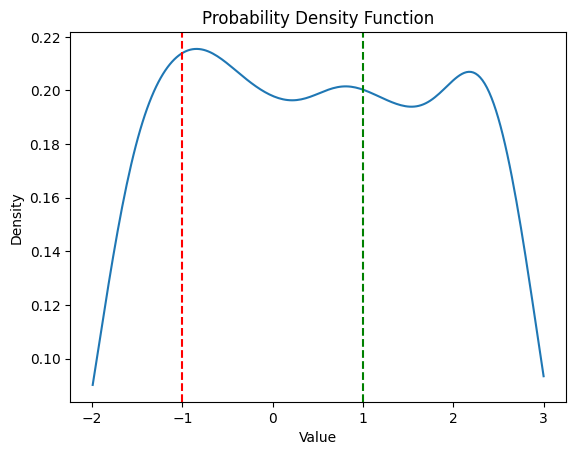

In [4]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad

def create_pdf(data):
    # Create a probability density function (PDF) of the data using kernel density estimation (KDE)
    kde = gaussian_kde(data)

    # Evaluate the PDF on a grid of points
    x_vals = np.linspace(min(data), max(data), num=200)
    y_vals = kde(x_vals)

    # Return the x and y values of the PDF
    return x_vals, y_vals

def calculate_integral(pdf, x_start, x_end, num_points=10000):
    # Define a lambda function for the PDF that takes a single argument x
    pdf_func = lambda x: np.interp(x, pdf[0], pdf[1])
    
    # Calculate the integral of the PDF over the given range using the quad function from scipy
    x_vals = np.linspace(x_start, x_end, num=num_points)
    y_vals = pdf_func(x_vals)
    dx = (x_end - x_start) / (num_points - 1)
    integral = np.sum(y_vals) * dx
    
    if integral >= 1:
        integral = 1
    
    return integral

# Generate a list of random values
data = []
for i in range(1000):
    value = random.uniform(-2, 3)
    data.append(value)

#
# Data can manually be difined as a list of values
#

# Create a probability density function (PDF) of the data
x_vals, y_vals = create_pdf(data)

# Calculate the integral of the PDF over a given range (x_start to x_end):
x_start = -1
x_end = 1
integral = calculate_integral((x_vals, y_vals), x_start, x_end)
print("Integral of PDF over [{}, {}]: {}".format(x_start, x_end, integral))

# Plot the PDF
plt.plot(x_vals, y_vals)
plt.axvline(x=x_start, color='r', linestyle='--', label='a')
plt.axvline(x=x_end, color='g', linestyle='--', label='b')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.show()

For poison process: $\newline$
Poisson process is useful when you encounter scenarios that involve counting the number of events occurring within a given interval or spatial region, where the events are assumed to happen independently and at a constant average rate.
$$P(k, \lambda) = \frac{{e^{-\lambda} \cdot \lambda^k}}{{k!}}$$

In [11]:
import math

def poisson_probability(lmbda, k):
    """
    Calculates the probability of a Poisson process.

    Parameters:
    - lmbda: The average rate of the Poisson process. How many events are expected to happend within the frame
    - k: The number of events to calculate the probability for.

    Returns:
    - The probability of k events occurring in a Poisson process with rate lmbda.
    """
    return (math.exp(-lmbda) * (lmbda ** k)) / math.factorial(k)

# Example usage:
# 5 cars are expected to cross the brigde every hour
# what is the probability that only 3 cars cross the bridge at any given hour?:
lmbda = 5  # Average rate of the Poisson process
k = 3  # Number of events

probability = poisson_probability(lmbda, k)
print(f"{probability}")

0.14037389581428056


Maximum Likelihood Estimation (MLE): 
$$\text{MLE}(\theta) = \arg\max_{\theta} \prod_{i=1}^{n} f(x_i; \theta)$$